# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID: 2019121004, 2018102002 <br>
YOUR-NAME: Avani Gupta, Sreeharsha Paruchuri  <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show('Levenberg–Marquardt')

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gradient Descent converged at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)

def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gauss Newton converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 1
            break
    if(converged==0):
        print("Gauss Newton Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    iterations = 1000
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr+1e-30))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss <= squaredDistance:
                lr /= 1.1
            else:
                lr *= 1.1
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr)+1e-30)@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Levenberg–Marquardt converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged = 1
            
            break
    if(converged==0):
        print("The Levenberg–Marquardt Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [3]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(lgd,'r--',label = 'Gradient Descent')
    plt.plot(lgn,'m.',label = 'Gauss Newton')
    plt.plot(llm,'g-',label = 'Levenberg–Marquardt')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(xObserved,yObserved,'b.',label='Ground Truth')
    plt.plot(xObserved,ygd,'r',label = 'Gradient Descent')
    plt.plot(xObserved,ygn,'m',label = 'Gauss-Newton')
    plt.plot(xObserved,ylm,'g',label = 'Levenberg–Marquardt')
    plt.title('Combined Data and fit plot')
    plt.legend()
    plt.show()
    

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


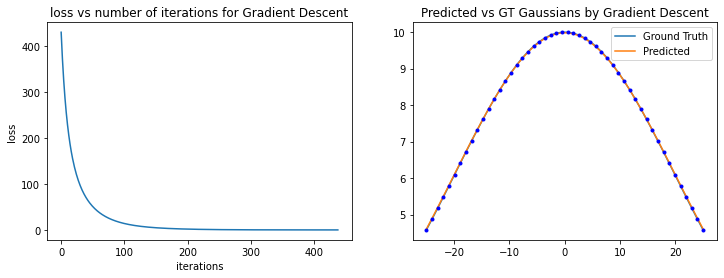

Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


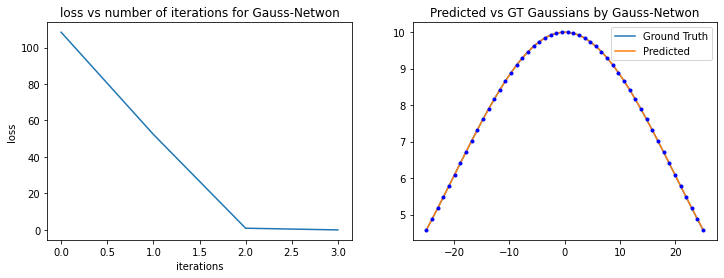

Levenberg–Marquardt converges at iteration  12
loss: 0.008238131064722001
a_est: 9.984891281369805  m_est: 4.596149701671068e-05  s_est: 20.082023707540458


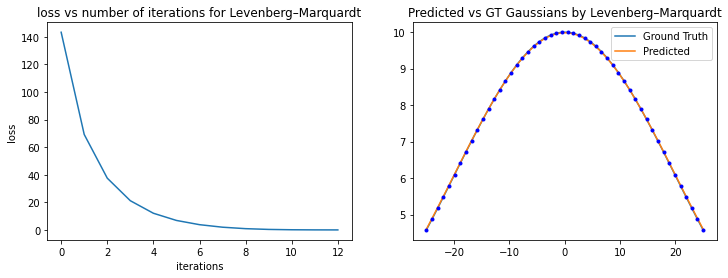

In [4]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"Gauss-Netwon")
ylm,llm = LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
plot(xObserved,yObserved, ylm, llm,"Levenberg–Marquardt")




##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

From the above graphs we can see that for the parameters that Gradient descent performs poorly when compared to the other two. This is observable from the number of iterations taken for each algorithm to converge. The graph for Gradient descent is on another scale. This demonstrates the superiority of the other two optimisation methods to gradient descent. <br/> <br/>
While for the given set of initialisations, Gauss newton outperforms gradient descent, this observation is extended for other initialisations as well. Gauss newton is able to converge to the local minima faster than gradient descent as it assumes that each funcion is locally quadratic.<br/><br/>
Sadly, that comes with it's own drawbacks, this involves knowledge obtained from the second derivate, computation of which is very intensive and thus proves to be rather infeasible.
This is where the Levenberg–Marquardt algorithm comes into its own. When far away from a minima, it acts like a gradient descent optimisation method. This is feasible thanks to its low computation cost. As the parameters converge to the minima, the Levenberg–Marquardt algorithm uses the Gauss Newton optimisation algorithm to find the minima.

# Optimising Gradient descent parameters

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


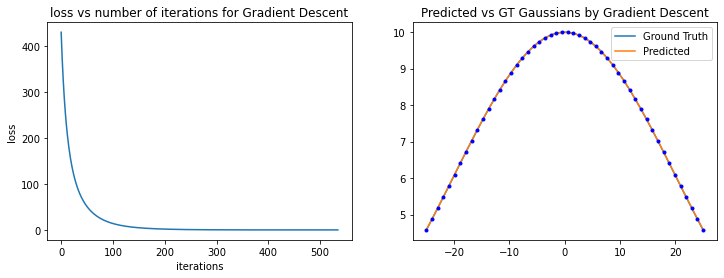

In [5]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


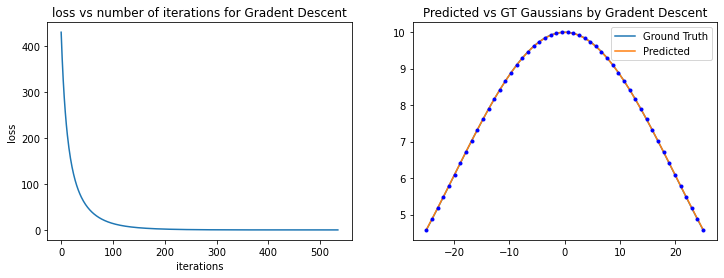

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


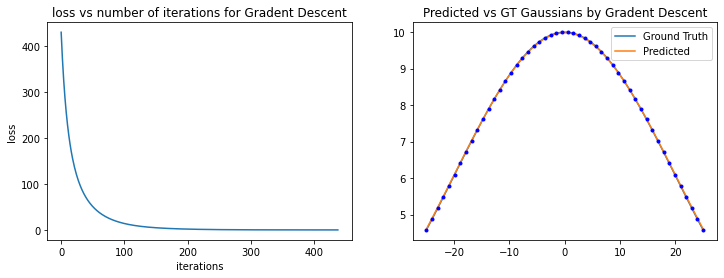

Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776


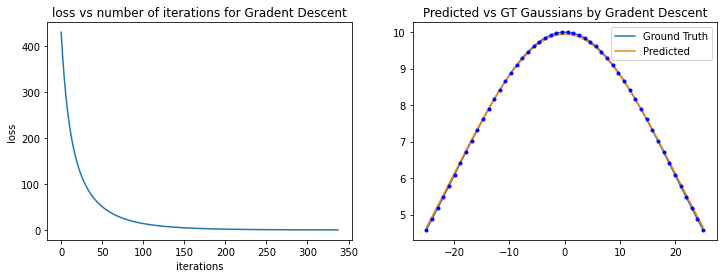

Gradient Descent converged at iteration  229
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136


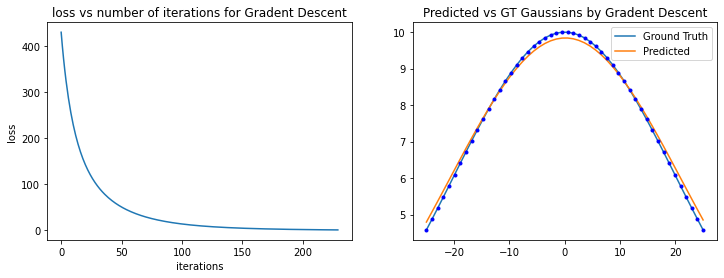

Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253


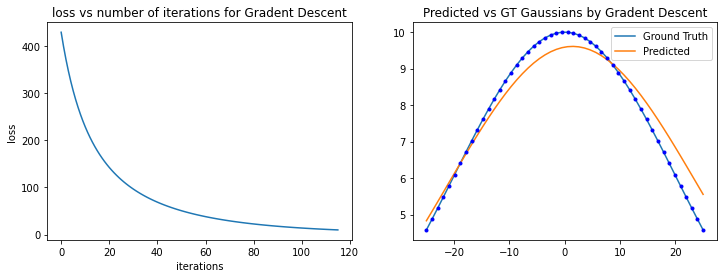

Gradient Descent converged at iteration  30
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326


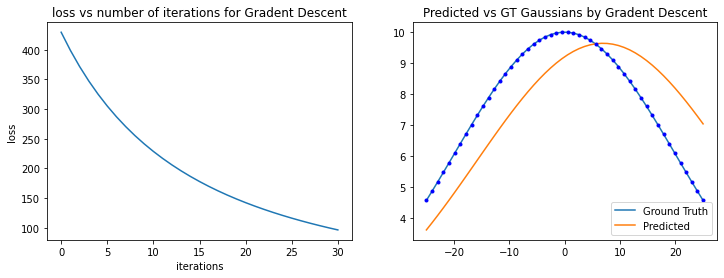

In [6]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"Gradent Descent")

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387


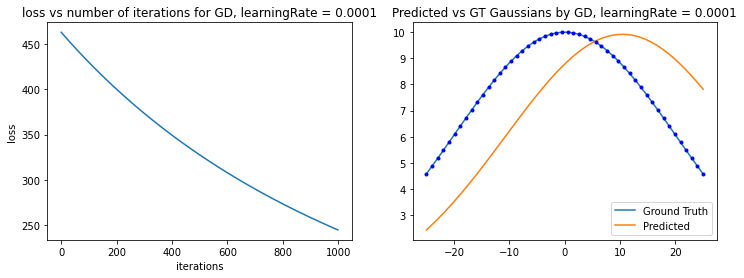

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681


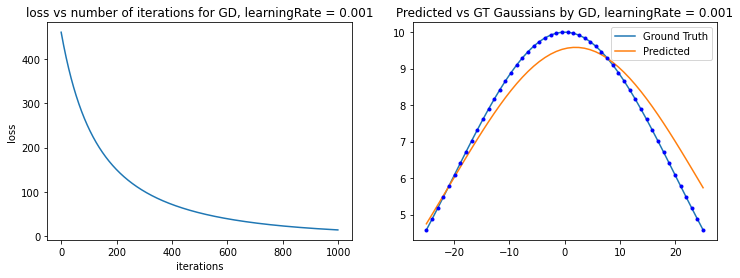

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


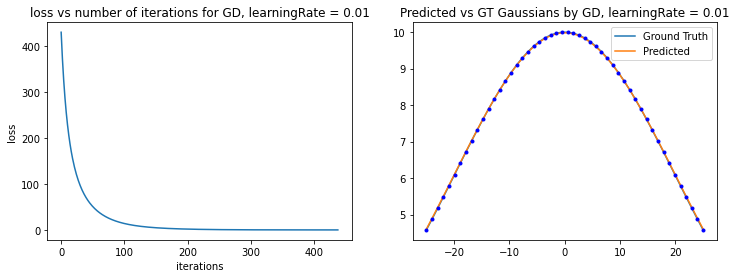

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415


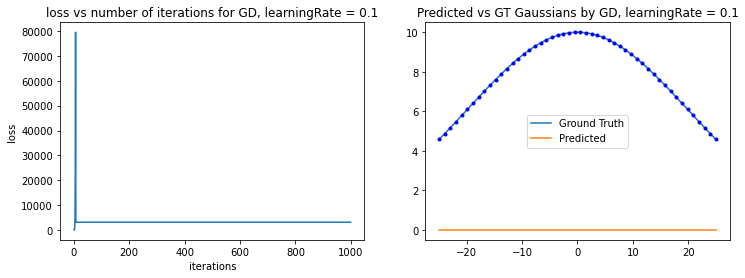

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422


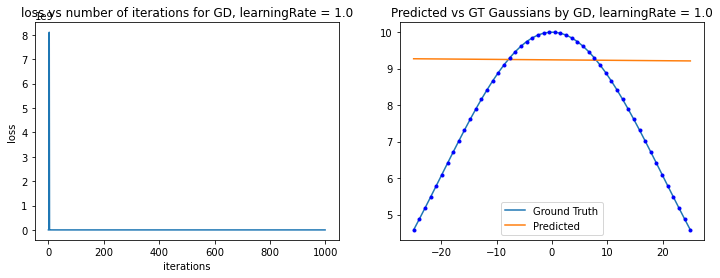

In [7]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1])

for l in learningrate:
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-2)
    plot(xObserved,yObserved,ygd, lgd,"GD, learningRate = "+str(l))

As we see on increasing tolerance the algorithm converges in a lower number of iterations but the L2 loss increases. 

# Comparing among the 3 algorithms 


 tolerance  0.001
Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  14
loss: 0.00025637544469674073
a_est: 9.997162409814843  m_est: -1.2120134451566646e-08  s_est: 20.014321329594235


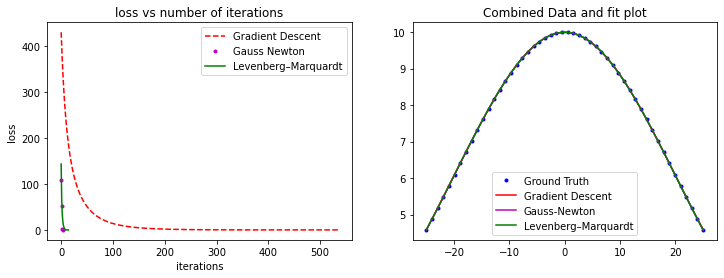


 tolerance  0.01
Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  12
loss: 0.008238131064722001
a_est: 9.984891281369805  m_est: 4.596149701671068e-05  s_est: 20.082023707540458


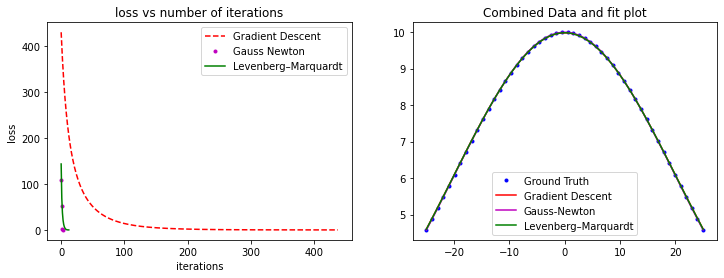


 tolerance  0.1
Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  11
loss: 0.034974061127665
a_est: 9.969983949166876  m_est: 0.00047889987492448125  s_est: 20.170162407966448


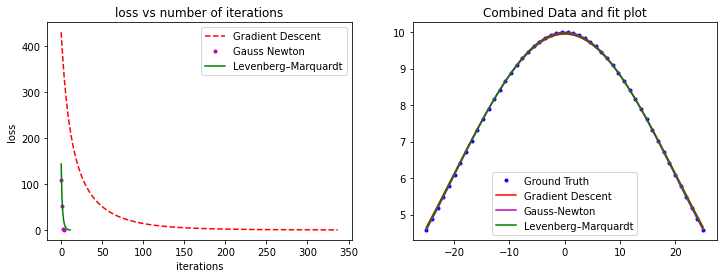


 tolerance  1.0
Gradient Descent converged at iteration  229
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  8
loss: 0.9150815860710708
a_est: 9.843482523198501  m_est: 0.055040517588691246  s_est: 20.906104459481384


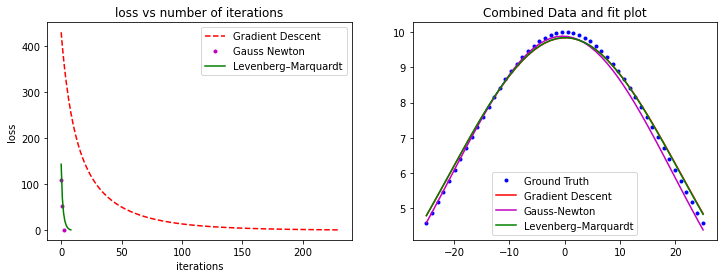


 tolerance  10.0
Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  5
loss: 6.87477605917122
a_est: 9.617432167974474  m_est: 0.8205422766596331  s_est: 22.445089862286263


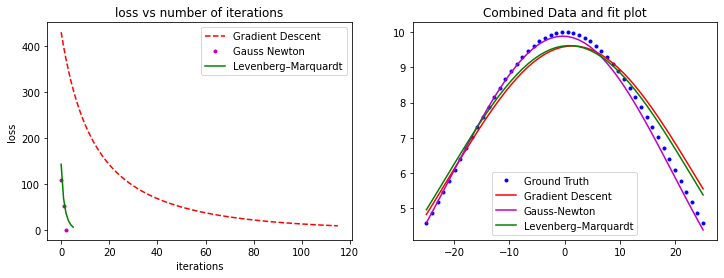


 tolerance  100.0
Gradient Descent converged at iteration  30
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326
Gauss Newton converges at iteration  1
loss: 52.36132656683978
a_est: 9.855255737881372  m_est: -2.4823688211532247  s_est: 17.191041633602573
Levenberg–Marquardt converges at iteration  1
loss: 69.17211068779568
a_est: 9.525499045458915  m_est: 5.863037626338082  s_est: 23.5619670666922


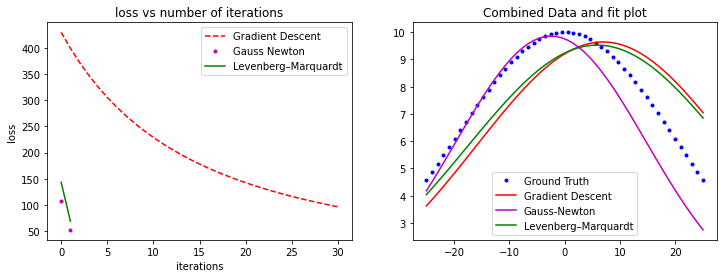

In [8]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


## Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
Yes, the Gauss newton algorithm and LM both converge for initial estimates which are relatively far from the Ground Truth.
GD on the other hand is not able to converge for far off estimates but converges for medium to low changes to initial estiamtes
LM as expected does far better than GN or GD

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Gradient Descent converged at iteration  401
loss: 0.009796680630617503
a_est: 9.983914372250908  m_est: 0.0006691704240702463  s_est: 20.08957755979924
Gauss Newton converges at iteration  3
loss: 0.000299813684922257
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056
Levenberg–Marquardt converges at iteration  25
loss: 0.00950332195634541
a_est: 10.016629121823541  m_est: -8.522100126279186e-16  s_est: 20.00300066191671


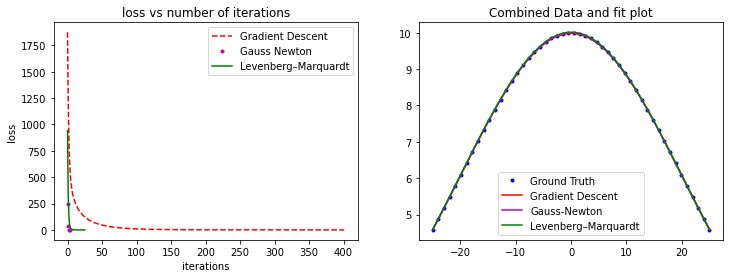

for a_est: 15.0  m_est: 15.0  s_est: 30.0
Gradient Descent converged at iteration  890
loss: 0.009864920462375382
a_est: 9.983857418338392  m_est: 1.4524153694149432e-05  s_est: 20.089896470068705
Gauss Newton converges at iteration  2
loss: 0.004347443763877181
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278
Levenberg–Marquardt converges at iteration  28
loss: 0.009375382066598211
a_est: 9.98348218976729  m_est: -2.129210659103679e-10  s_est: 19.997016259457595


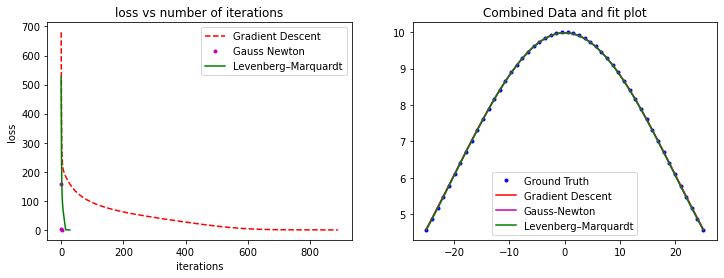

for a_est: 0.0  m_est: 5.0  s_est: 30.0
Gradient Descent converged at iteration  657
loss: 0.009952980128885996
a_est: 9.983785522880186  m_est: 2.0620867812463206e-05  s_est: 20.090299064355474
Gauss Newton converges at iteration  4
loss: 8.389378771688895e-06
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058
Levenberg–Marquardt converges at iteration  50
loss: 0.009972146213063601
a_est: 10.017034041144711  m_est: -1.3372820645979333e-15  s_est: 20.003075457546835


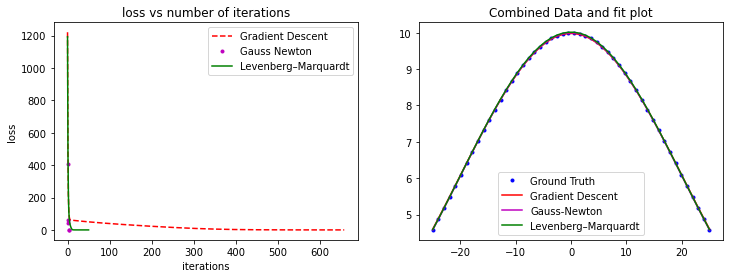

for a_est: 10.0  m_est: 5.0  s_est: 45.0
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094336  s_est: 28.942726366387507
Gauss Newton converges at iteration  4
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
Levenberg–Marquardt converges at iteration  23
loss: 0.003912194723488196
a_est: 10.010609116631224  m_est: -8.656000065607465e-05  s_est: 20.002258908526375


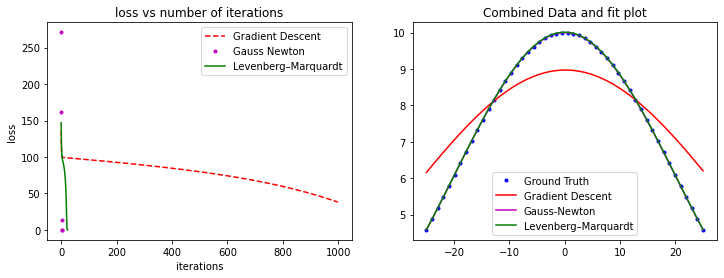

In [9]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


## Different number of observations: Can a particular algorithm handle very less observations?
Amongst the three, the LM and Gauss Newton algorithms can handle a --relatively-- low number of observations whereas Gradient Descent needs a --relatively-- large number of observations which is explanable since GD would overshoot the optima with very less observations.

for 3 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 1.361834569231924
a_est: 9.782507893942505  m_est: 2.846335132629472  s_est: 20.69660585912227
Gauss Newton converges at iteration  3
loss: 0.00019677680209477538
a_est: 9.993392229706926  m_est: -0.030587305575274115  s_est: 20.008658030843684
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 6.520460488053115e-44
loss: 3274.763266449555
a_est: 39.32573931616608  m_est: -6.346975250730268e-05  s_est: 116646.39860809503


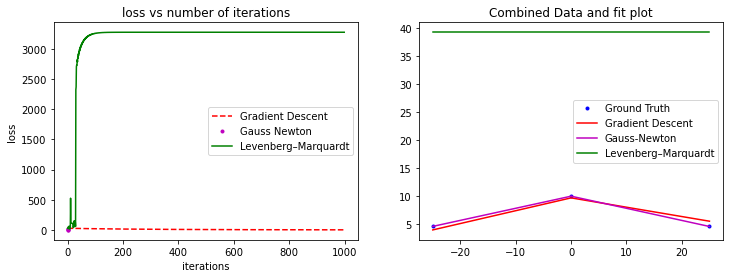

for 5 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.8033553810592257
a_est: 9.671312932510027  m_est: 1.320779740036514  s_est: 21.55819774742659
Gauss Newton converges at iteration  3
loss: 6.822132516514347e-07
a_est: 9.99953576158538  m_est: 0.0009729449535180734  s_est: 20.00129727638786
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 6.520460488053115e-44
loss: 10141.89280414115
a_est: 52.10660392388767  m_est: -1.0926987665968051e-07  s_est: 94020.38601835335


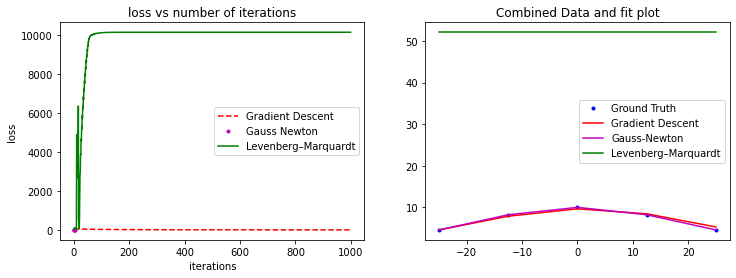

for 8 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.3067915317811297
a_est: 9.79144259226785  m_est: 0.3646028715585416  s_est: 21.07407526815394
Gauss Newton converges at iteration  3
loss: 2.586108647302488e-06
a_est: 9.999194476494596  m_est: 0.0012791317364211907  s_est: 20.002078267024665
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516572e-44
loss: 117.52198163711464
a_est: 15.00522210387041  m_est: -0.027909409686201397  s_est: 19.878869921167208


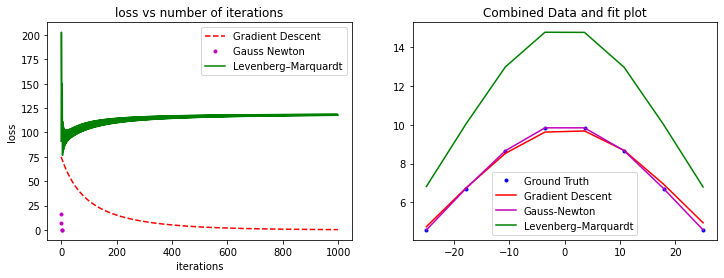

for 10 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.1671535829191982
a_est: 9.854238522506572  m_est: 0.14454448038274564  s_est: 20.76240010897147
Gauss Newton converges at iteration  3
loss: 4.411168904626436e-06
a_est: 9.999039352460887  m_est: 0.001423908126779616  s_est: 20.00243233170898
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516572e-44
loss: 5.886509179117657
a_est: 8.978852496697801  m_est: -2.4139964080177866e-05  s_est: 20.22287664818287


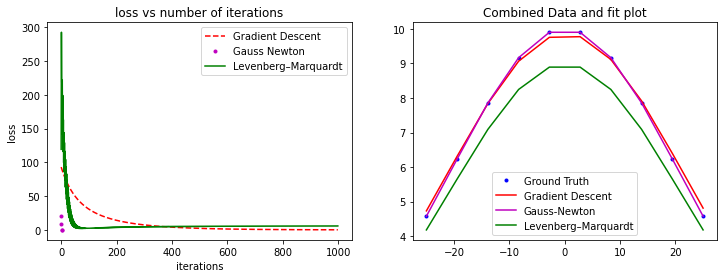

for 12 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.08919760436492694
a_est: 9.900920172350519  m_est: 0.05470968384771716  s_est: 20.522280122685974
Gauss Newton converges at iteration  3
loss: 6.538621003810688e-06
a_est: 9.998921363178901  m_est: 0.0015351242660192055  s_est: 20.00270114784195
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 738.7277351660993
a_est: -7.996158363441792  m_est: 82.19639488254342  s_est: -3.7880109297606195


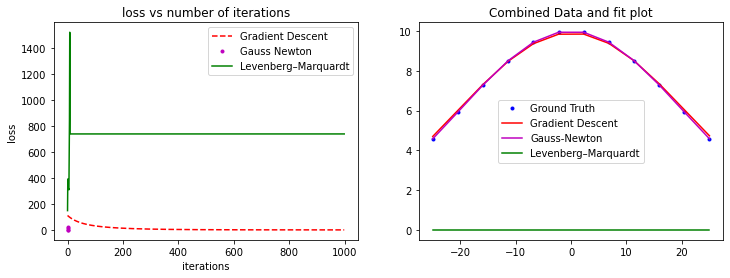

for 15 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.0321334676156451
a_est: 9.94651013692598  m_est: 0.011918080552842217  s_est: 20.28405217506781
Gauss Newton converges at iteration  3
loss: 1.0124448893529497e-05
a_est: 9.998790099648726  m_est: 0.001660061944417257  s_est: 20.002999731443374
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516572e-44
loss: 13.851841733878883
a_est: 8.754817728256809  m_est: 3.890479165083952e-06  s_est: 20.18083413304721


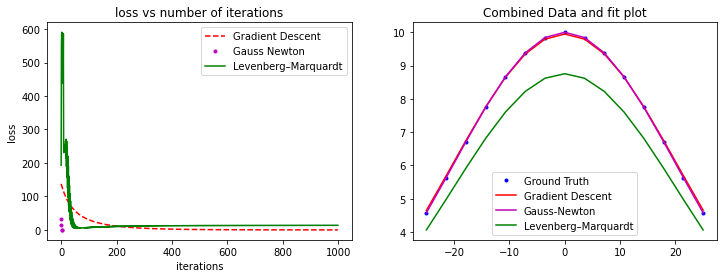

for 20 observations
Gradient Descent converged at iteration  927
loss: 0.009996098095625424
a_est: 9.974199822145414  m_est: 0.0018870846927118237  s_est: 20.138736731864906
Gauss Newton converges at iteration  3
loss: 1.676553903048887e-05
a_est: 9.99864394358403  m_est: 0.0018008548654847578  s_est: 20.003331644638056
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 6.520460488053115e-44
loss: 12.576193079888247
a_est: 8.970132069684801  m_est: 0.00036505147663923754  s_est: 20.2048482432932


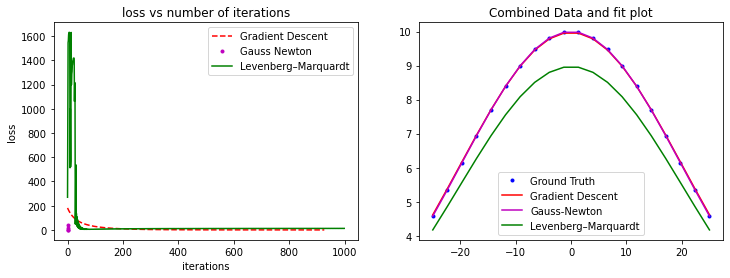

for 22 observations
Gradient Descent converged at iteration  861
loss: 0.009914538147070712
a_est: 9.975518001575074  m_est: 0.0015695054824977355  s_est: 20.132358603687237
Gauss Newton converges at iteration  3
loss: 1.9573338898722986e-05
a_est: 9.998601259549607  m_est: 0.0018423351709301317  s_est: 20.003428476437158
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 9.546606200558569e-44
loss: 31633.017898838298
a_est: -30.12451524225238  m_est: -0.07969075066665574  s_est: 100564.77263150728


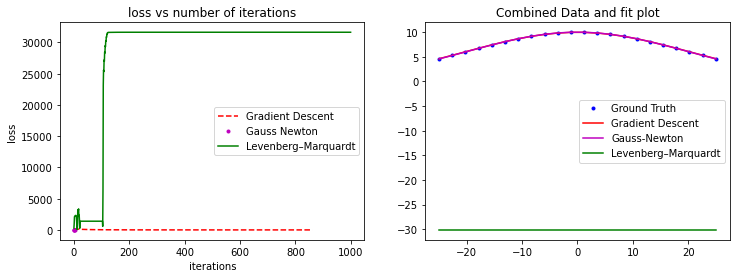

for 25 observations
Gradient Descent converged at iteration  777
loss: 0.009990168925898067
a_est: 9.976965037804238  m_est: 0.0012581836501103683  s_est: 20.12534592726369
Gauss Newton converges at iteration  3
loss: 2.3895336623477368e-05
a_est: 9.998548337305749  m_est: 0.0018940047725510278  s_est: 20.003548473775112
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 6.520460488053115e-44
loss: 1590.417380184547
a_est: -2.7547107565621727  m_est: 144.89934262269074  s_est: 8.034084461966762


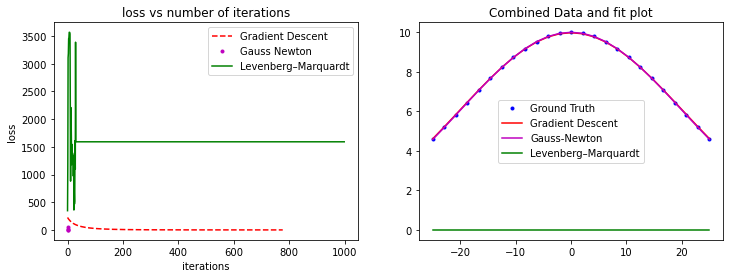

for 28 observations
Gradient Descent converged at iteration  709
loss: 0.00998218912441635
a_est: 9.978256045898153  m_est: 0.0010296338833189096  s_est: 20.11891825316038
Gauss Newton converges at iteration  3
loss: 2.831857348020525e-05
a_est: 9.99850540776048  m_est: 0.0019361183935853732  s_est: 20.003645765503006
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.155139350267587e-43
loss: 1786.8141995456094
a_est: -2274.520728679229  m_est: -6105.363190113716  s_est: 405.2077681581719


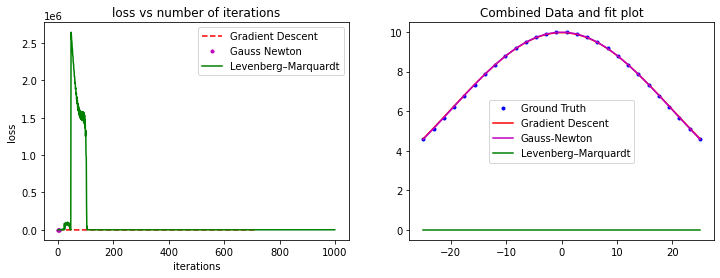

for 30 observations
Gradient Descent converged at iteration  671
loss: 0.009856988557767253
a_est: 9.979132431355195  m_est: 0.000900076341453206  s_est: 20.114438520085166
Gauss Newton converges at iteration  3
loss: 3.1311110611247665e-05
a_est: 9.998481030232975  m_est: 0.0019601141047348447  s_est: 20.003700993932338
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516572e-44
loss: 20711.686649044743
a_est: -18.420594460748276  m_est: -106.74356771662026  s_est: 125074.10875197145


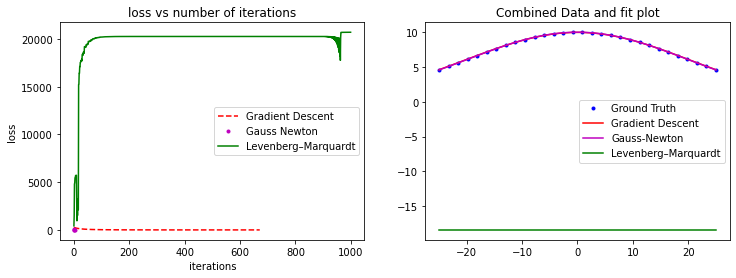

for 34 observations
Gradient Descent converged at iteration  605
loss: 0.009874613621464277
a_est: 9.980391302984653  m_est: 0.0007278821995894252  s_est: 20.108027382334647
Gauss Newton converges at iteration  3
loss: 3.73773682428506e-05
a_est: 9.998440035660499  m_est: 0.0020006020347652087  s_est: 20.00379383923428
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 9.546606200558569e-44
loss: 2179.5527126110865
a_est: -15552.263174689826  m_est: 17142.83456881612  s_est: -141.15345737399184


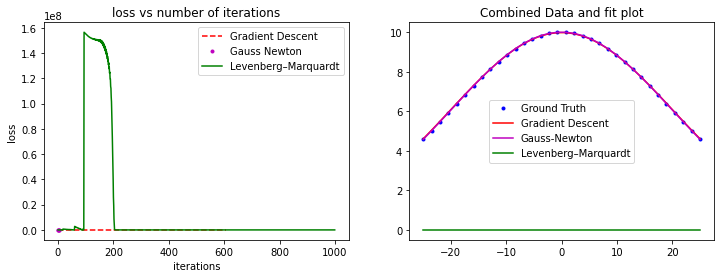

for 38 observations
Gradient Descent converged at iteration  551
loss: 0.009935397459632185
a_est: 9.981402652945823  m_est: 0.0006076525752914704  s_est: 20.1028248721946
Gauss Newton converges at iteration  3
loss: 4.3527101845207843e-05
a_est: 9.998406912852715  m_est: 0.0020334413789040995  s_est: 20.003868829596428
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516572e-44
loss: 30.269208398723475
a_est: 8.858749245992596  m_est: 4.752116049383591e-05  s_est: 20.183732243292972


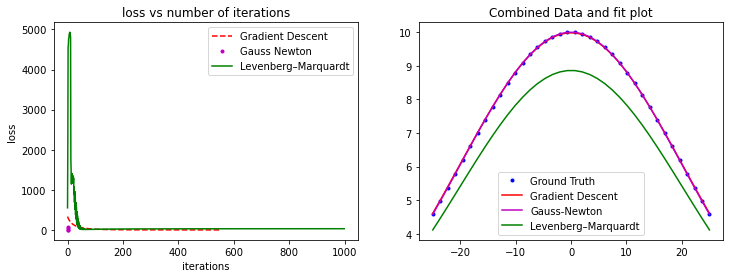

for 42 observations
Gradient Descent converged at iteration  507
loss: 0.009826197949264776
a_est: 9.98241356844858  m_est: 0.0005074617123130799  s_est: 20.09751235840949
Gauss Newton converges at iteration  3
loss: 4.973927809690465e-05
a_est: 9.998379597195894  m_est: 0.002060609125573154  s_est: 20.00393065481319
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 726.5562063457327
a_est: 4.804412013411289  m_est: -0.00021158263713831615  s_est: 20.13422647793285


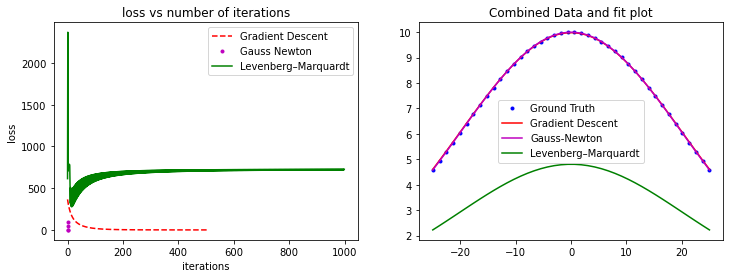

for 48 observations
Gradient Descent converged at iteration  452
loss: 0.009957365602349028
a_est: 9.983446162572967  m_est: 0.00041339708505550905  s_est: 20.092102156608174
Gauss Newton converges at iteration  3
loss: 5.914401117993854e-05
a_est: 9.99834656397662  m_est: 0.0020935684037022284  s_est: 20.004005399925685
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 3095.7966062847395
a_est: -16.55860089907768  m_est: 124.27425370215614  s_est: -6.582871226094062


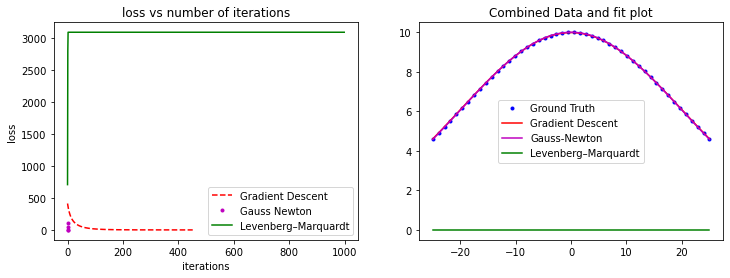

for 50 observations
Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 3226.679398346162
a_est: -20.977694065323636  m_est: 119.34112782775364  s_est: 6.242487236529674


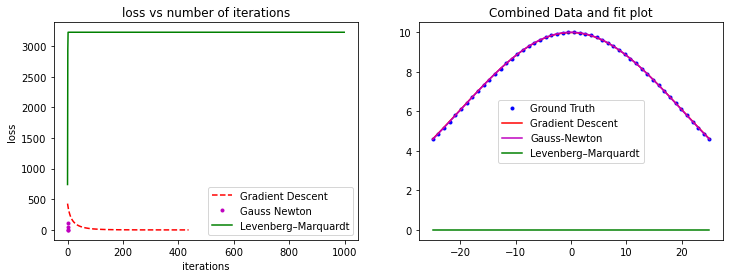

for 52 observations
Gradient Descent converged at iteration  422
loss: 0.009970022557608135
a_est: 9.984088619408526  m_est: 0.0003630392043565737  s_est: 20.08868848686721
Gauss Newton converges at iteration  3
loss: 6.545743963476531e-05
a_est: 9.998328504120735  m_est: 0.002111636866982791  s_est: 20.0040462548287
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 3357.5607033057167
a_est: -24.96892289794842  m_est: 125.50914803144784  s_est: -6.652416652630693


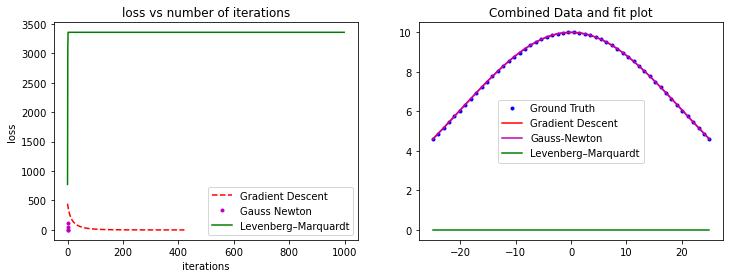

for 55 observations
Gradient Descent converged at iteration  403
loss: 0.009746468289601217
a_est: 9.984705044999943  m_est: 0.0003223159689647399  s_est: 20.085348149020756
Gauss Newton converges at iteration  3
loss: 7.021047984500087e-05
a_est: 9.998316578282566  m_est: 0.002123587530440063  s_est: 20.004073229712663
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 6.520460488053115e-44
loss: 3553.8802338630694
a_est: -37.718804980157444  m_est: 202.74077110046778  s_est: -11.798428057594482


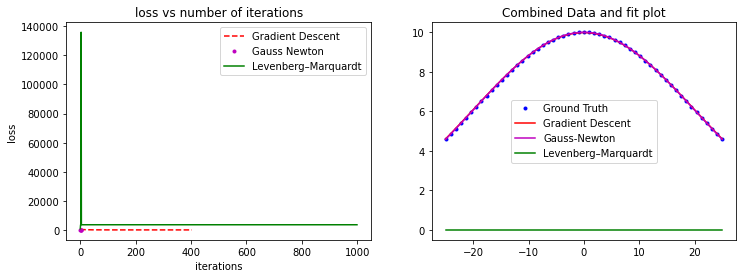

for 60 observations
Gradient Descent converged at iteration  373
loss: 0.009969956306599474
a_est: 9.985191934673193  m_est: 0.0002873228527277071  s_est: 20.082776386717452
Gauss Newton converges at iteration  3
loss: 7.816015924697865e-05
a_est: 9.99829920408904  m_est: 0.0021410252826963294  s_est: 20.00411252295814
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 5.388810320705053e-44
loss: 3881.0740766316403
a_est: -100.63860301982753  m_est: 88.622106740276  s_est: -4.169249333278076


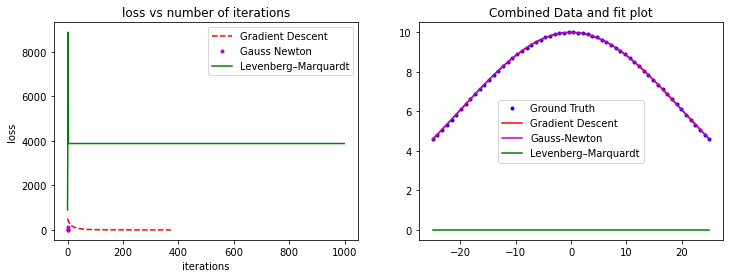

In [17]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Add noise to your observations: Can a particular algorithm handle large noise?
LM and Gauss newton can handle noisy data better than GD.

for * 0.0001  noise
Gradient Descent converged at iteration  437
loss: 0.009909566209781001
a_est: 9.984321826967665  m_est: -0.0006278278044047856  s_est: 20.088324672695045
Gauss Newton converges at iteration  3
loss: 0.0001467823064668544
a_est: 9.998771055372165  m_est: 0.0010853694528999425  s_est: 20.002621888082157
Levenberg–Marquardt converges at iteration  12
loss: 0.00830982582437738
a_est: 9.985334417194991  m_est: -0.0009609042735088811  s_est: 20.080573732251935


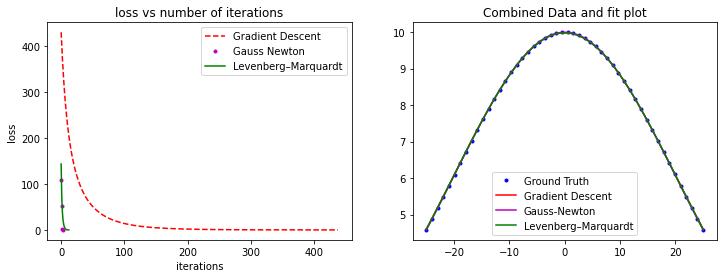

for * 0.0002  noise
Gradient Descent converged at iteration  438
loss: 0.009791295997047636
a_est: 9.984629672435796  m_est: 0.0011096589133391575  s_est: 20.08688897224046
Gauss Newton converges at iteration  3
loss: 0.00027076389359705105
a_est: 9.998876998194504  m_est: 0.002832375689726274  s_est: 20.002357605917798
Levenberg–Marquardt converges at iteration  12
loss: 0.008419623400432981
a_est: 9.985457493337764  m_est: 0.0007852080078531802  s_est: 20.080186704873924


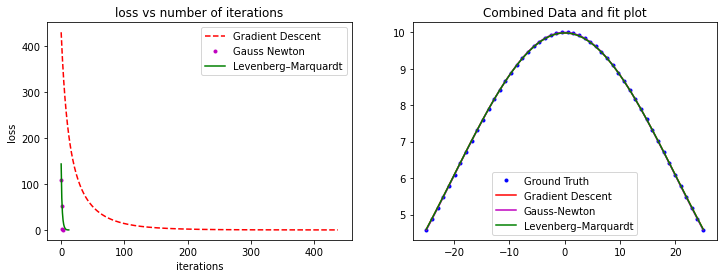

for * 0.001  noise
Gradient Descent converged at iteration  464
loss: 0.009907969002624138
a_est: 9.987537133664459  m_est: 0.001376145110497357  s_est: 20.06205253054708
Gauss Newton converges at iteration  3
loss: 0.0047758965267202915
a_est: 9.997590516437107  m_est: 0.003290399139603495  s_est: 20.000982528961988
Levenberg–Marquardt converges at iteration  13
loss: 0.00631593168445725
a_est: 9.993045888696743  m_est: 0.0011997032256990277  s_est: 20.03305334312621


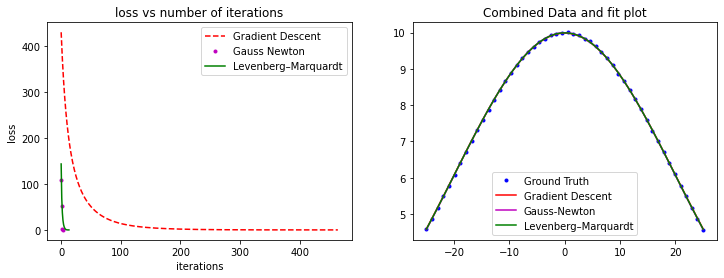

for * 0.002  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.019253566744988612
a_est: 9.998035816148853  m_est: -0.018519475106653287  s_est: 19.99624690525724
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.019253553014614552
a_est: 9.998054859645508  m_est: -0.01851922344051985  s_est: 19.99614145859981
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516565e-41
loss: 0.019253646930508992
a_est: 9.998107030450836  m_est: -0.01851611680893083  s_est: 19.99615145887524


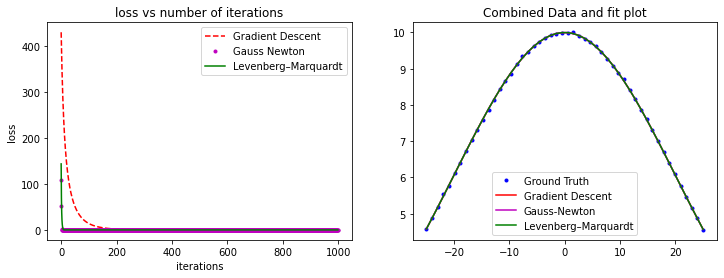

for * 0.01  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.46088444815580465
a_est: 10.001066531197548  m_est: 0.0013433857186968977  s_est: 20.02272971751689
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.4608844333445578
a_est: 10.001086296191483  m_est: 0.0013432013042511647  s_est: 20.022619981730948
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516565e-41
loss: 0.46088449257210995
a_est: 10.00112289784682  m_est: 0.0013298800269332407  s_est: 20.02265214842823


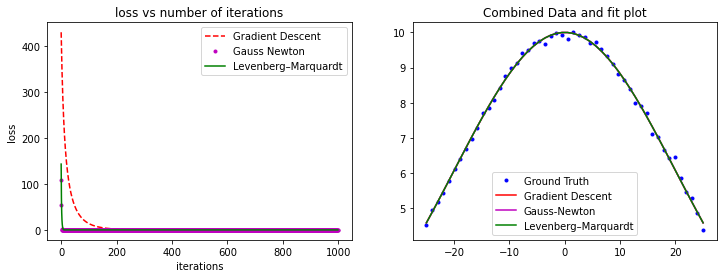

for * 0.1  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 54.729153741574954
a_est: 10.299371189740796  m_est: 0.8906677007562305  s_est: 18.57711898349104
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 54.72915374157303
a_est: 10.299371415659637  m_est: 0.8906676052180196  s_est: 18.57711795676744
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516565e-41
loss: 332.2574440760406
a_est: 13.704849678455572  m_est: 0.9147306302446827  s_est: 17.13992754822485


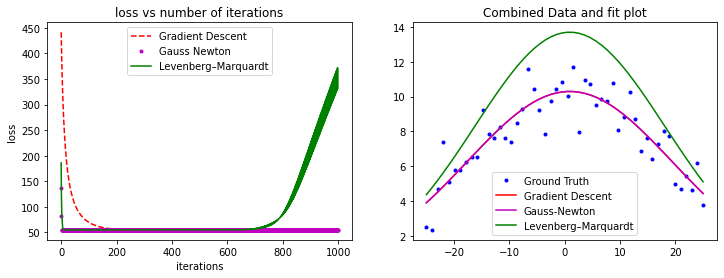

for * 1  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 4327.414662990042
a_est: 10.795981570805754  m_est: -3.4009283741547183  s_est: 14.092669469803745
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 4327.4146629900415
a_est: 10.795981570805967  m_est: -3.400928374154576  s_est: -14.092669469803214
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 4.453562248516565e-41
loss: 4327.414677031429
a_est: 10.796733489478356  m_est: -3.400776547272102  s_est: 14.092683137560964


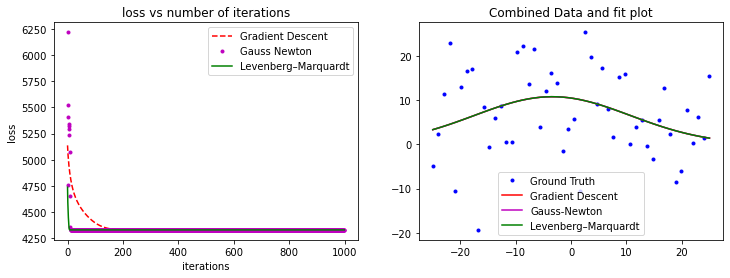

In [18]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100,1/10,1]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higher levels of white noise LM ois still nearer than GD or GN. For medium noise only LM and Gauss Newton converge, for low noise all converge, given learning rate and tolerance kept fixed.

## Different Learning rates

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.453562248516574e-46
loss: 3226.679398346162
a_est: -337.46924157927657  m_est: 764.086591574468  s_est: 48.28510840465501


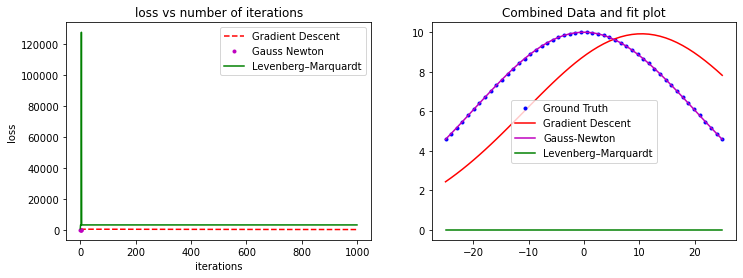

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.3888103207050455e-45
loss: 3226.679398346162
a_est: -138.78804987762433  m_est: 440.2625113370752  s_est: 27.22786772852011


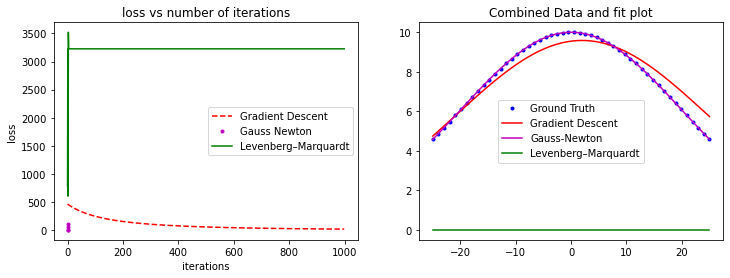

Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.388810320705053e-44
loss: 3226.679398346162
a_est: -20.977694065323636  m_est: 119.34112782775364  s_est: 6.242487236529674


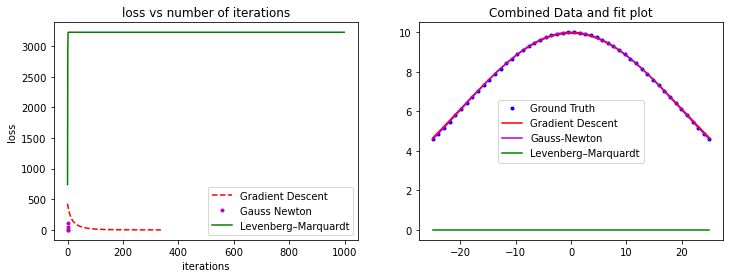

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.4535622485165725e-43
loss: 26.393673687334903
a_est: 10.941986061816559  m_est: 0.015380560933798113  s_est: 19.799290943431526


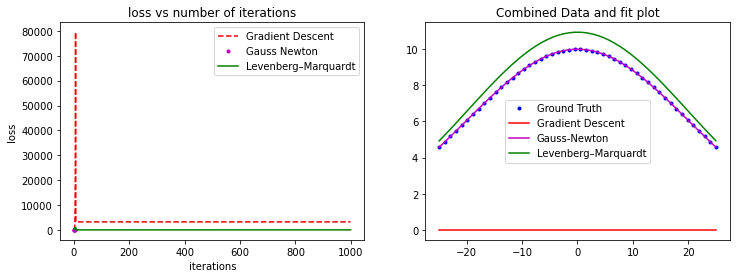

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.453562248516579e-42
loss: 1.6808195343817343
a_est: 10.220762507786105  m_est: 0.0005955710167145707  s_est: 20.04130771058683


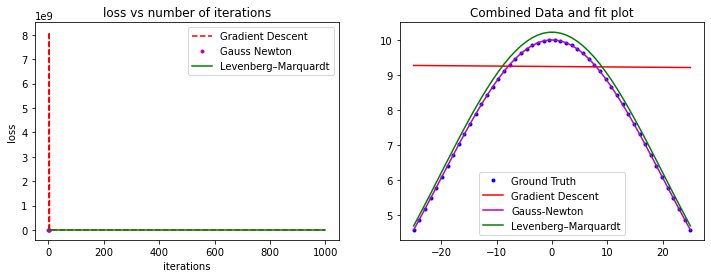

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0
loss: 3226.679398346162
a_est: -285725.2570507009  m_est: -72661.47692430415  s_est: -1907.0478644905234
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.907124497033159e-42
loss: 0.1898839462495636
a_est: 10.074308998301655  m_est: 1.1245528789421977e-08  s_est: 20.013470222659603


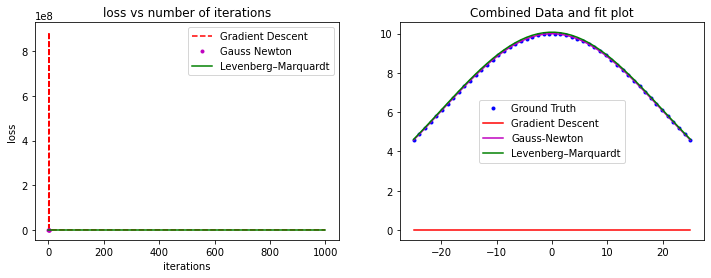

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0
loss: 8.423179077164466e+42
a_est: 3.0266628797201995e+26  m_est: -5.5626608307154726e+25  s_est: -1.070102501920274e+25
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  11
loss: 0.09222041211460125
a_est: 10.051799348115267  m_est: 1.1846298897865912e-07  s_est: 20.00933167146717


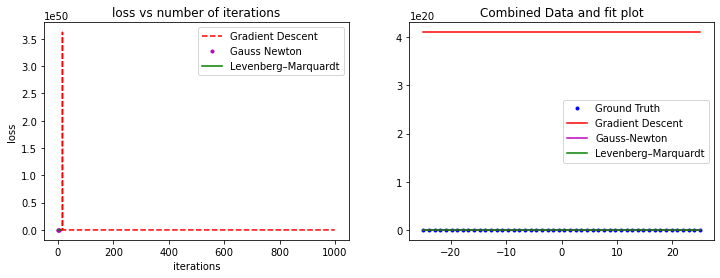

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.0
loss: 3226.679398346162
a_est: -5.278964399787951e+22  m_est: -2.728357095189793e+22  s_est: 4.719937221661777e+20
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  6
loss: 0.08913333606579353
a_est: 9.930831319850821  m_est: -1.46216541612996e-05  s_est: 20.14172836466731


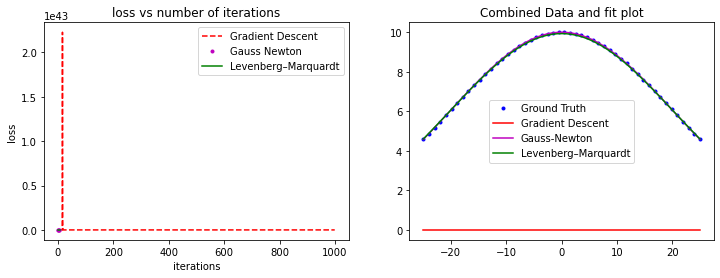

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.0
loss: 3226.6793983461585
a_est: 186720.26345227615  m_est: -13284.99955973455  s_est: -1399.004163212634
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  7
loss: 0.044787027172289044
a_est: 9.991814003501442  m_est: -1.199534795420093e-06  s_est: 20.16267890399529


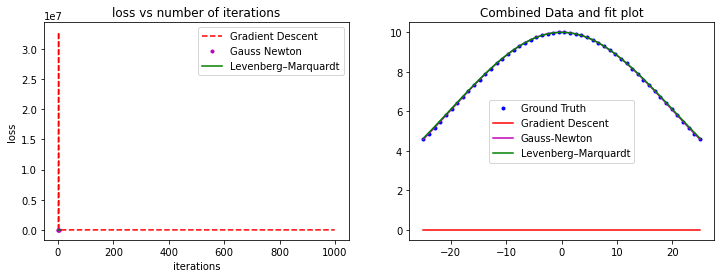

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.0
loss: 3226.6793985238173
a_est: -2094.2695584751345  m_est: -436.9266543183346  s_est: 55.275255914070016
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  9
loss: 0.07746008965891658
a_est: 9.957020778976776  m_est: 0.0011287979606052602  s_est: 20.254581270873054


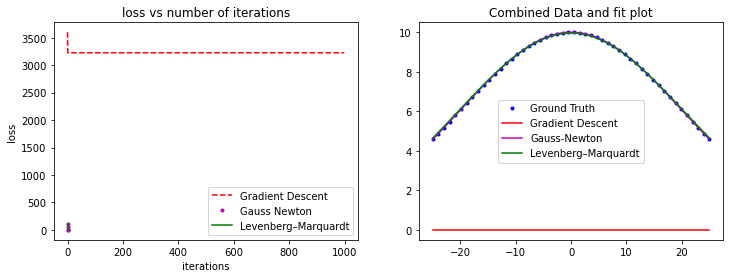

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 10.0
loss: 3226.679398346162
a_est: -3169.1548473035214  m_est: -591.1815735283033  s_est: 16.740048387473166
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  11
loss: 0.034974061127665
a_est: 9.969983949166876  m_est: 0.00047889987492448125  s_est: 20.170162407966448


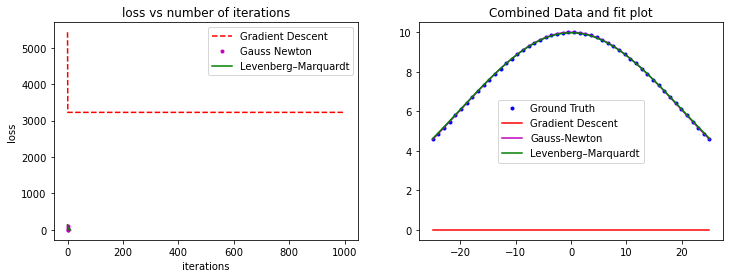

In [12]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e-1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
We experiment intensively as shown in figures shown above and report some of our experimentations. <br>
**observed trends** <br> 1) If the learning rate is too high or too small, theGradient descent algorithm doesnt converge. <br>
Explanation: With a small learning rate, the Gradient Descent algorithm is prone to taking a long time to converge and thus won't converge in the given upper bound on iterations. If we use too large a learning rate, the gradient descent algorithm is prone to overshooting the minima. <br>
2)Decrease in tolerance results in decrease in loss and number of iterations<br>
Explnation: False, a decrease in tolerance would lead to a decrease in loss as there's a smaller acceptable RMSE value but that wouldn't lead to a decrease in the number of iterations as to achieve such stringent conditions, the algorithm needs to run further iterations.


| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.0098 |437 |
| 0.01    | 1e-1    | 0.098 |337 |
| 0.1    | 1e-2     | 0.0098|437 |
| 1    | 1e-1    | 0.098 |337 |
| 0.0001    | 1e-2   | 244.49(at iter 999) |didn't converge in 999 iterations |
| 0.001    | 1e-2  | 14.12(at iter 999)|didn't converge in 999 iterations |
| 0.01    | 1e-2    | 0.0098 |437 |
| 0.1    | 1e-2  | 3226.67(at iter 999) |didn't converge in 999 iterations |
| 1   | 1e-2   | 251.123(at iter 999) |didn't converge in 999 iterations |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton,
10 for LM <br>
**Tolerance** 1e-2 for Gradient Descent, Gauss Newton and LM <br>
* The Gradient Descent, Gauss Newton and LM converge for above values of learning rate and toleracne in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
* The learning rate and tolerance kept fixed otherwise explicitly mentioned for below experimentations in order to find a good comparison of changes from initial convergence.  Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed. <br>
* Please check learning rate's stats printed along with graphs just above the cell(not reporting the same for sake of conveniance of comparison in table)

| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate: far different   | doesn't converge     | converges|doesn't converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | doesn't converge     | converges|converges |
| small(<=20) |doesn't converge | converges|converges|
| medium(<=42) |doesn't converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | doesn't converge     | converges|doesn't converge |
| on adding medium noise  | doesn't converge     | converges|doesn't converge |
| on adding large noise  | doesn't converge     | doesnt converges|doesn't converge |


Please check graphs and observations demostrated in cells above<br>
*Some more observations*
* the Gauss-Newton method typically converges much faster than gradient-descent methods.
* The Levenberg-Marquardt method acts more like a gradient-descent method when the parameters are far from their optimal value, and acts more like the Gauss-Newton method when the parameters are close to their optimal value.
* On varying initial estimates, number of observations and addition of noise Gauss newton is seen to perform well. 
* Gradient descent is not able to converge on small number of observations since gradient steps are much smaller based on learning rate, where as the steps in GN and LM are much larger.
* LM is not able to converge when initial estimates are far from ground truth estimates
* When learning rate is  is decreased, the Levenberg-Marquardt method approaches the Gauss-Newton method, and the solution typically accelerates to the local minimum (and converges)
* The gradient descent doesnt converge on larger learning rates since it overshoots the minima and may oscillate. 
* When learning rate is too small(0.01) Levenberge Marquardt doesnt converge for 1000 iterations whereas Gauss newton does converge.
* However we found that on increasing learning rate along with increasing tolerance, Levenberg Marquardt converges in less or equal iterations than Gauss Newton.

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 
Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [13]:
# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [14]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)

# Getting data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# Applying ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # current error?
        rmse = rms(X,P)
        # calling the visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # Implementation of ICP to get R, t
        #Computing the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Computing a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Using the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Using the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

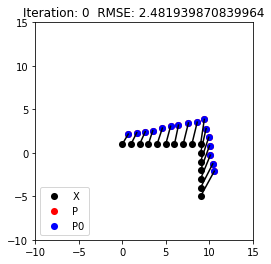

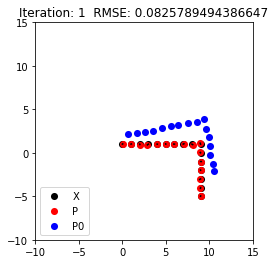

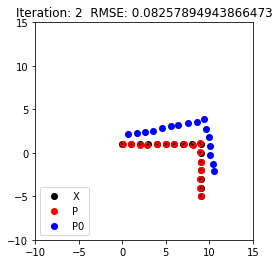

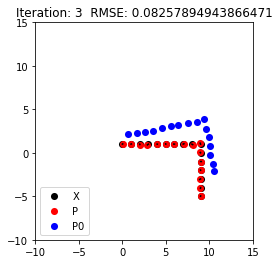

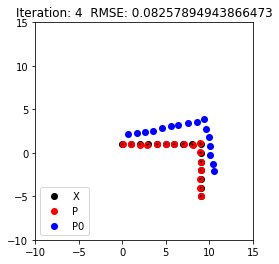

In [15]:
# Call ICP on P1 & P2
ICP(X,P1) 


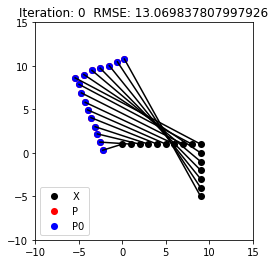

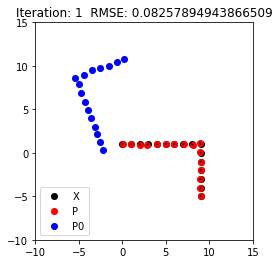

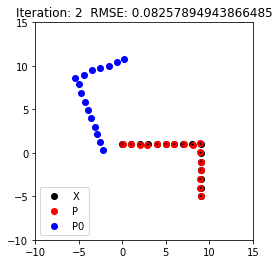

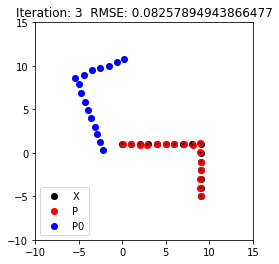

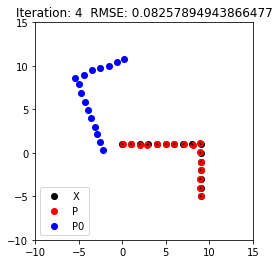

In [16]:
ICP(X,P2) 